In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
file_path = 'MPM-Historical-Data-AM2023.xlsx'  # Update this with the correct path
data = pd.read_excel(file_path)

In [22]:
# Rename columns for better readability
data.columns = [
    "Region", "Country_Code", "Economy", "Reporting_Year", 
    "Survey_Name", "Survey_Year", "Survey_Coverage", 
    "Welfare_Type", "Survey_Comparability", "Deprivation_Rate_Monetary", 
    "Educational_Attainment", "Educational_Enrollment", "Electricity", 
    "Sanitation", "Drinking_Water", "Poverty_Headcount_Ratio"
]

In [8]:
# Drop unnecessary rows (e.g., headers or notes within the data)
data = data[~data["Region"].isnull() & ~data["Country_Code"].isnull()]

# Replace region abbreviations with full forms
region_mapping = {
    "SSA": "Sub-Saharan Africa",
    "ECA": "Europe and Central Asia",
    "LAC": "Latin America and the Caribbean",
    "OHI": "Other High-Income",
    "SAR": "South Asia Region",
    "MNA": "Middle East and North Africa",
    "EAP": "East Asia and Pacific"
}
data['Region'] = data['Region'].replace(region_mapping)

In [10]:
# Convert numerical columns to proper data types
numeric_columns = [
    "Deprivation_Rate_Monetary", "Educational_Attainment", 
    "Educational_Enrollment", "Electricity", "Sanitation", 
    "Drinking_Water", "Poverty_Headcount_Ratio"
]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors="coerce")


In [24]:
# Basic Dataset Overview
print("Dataset Info:")
data.info()

print("\nFirst Few Rows:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Region                     760 non-null    object
 1   Country_Code               760 non-null    object
 2   Economy                    760 non-null    object
 3   Reporting_Year             760 non-null    object
 4   Survey_Name                760 non-null    object
 5   Survey_Year                760 non-null    object
 6   Survey_Coverage            756 non-null    object
 7   Welfare_Type               756 non-null    object
 8   Survey_Comparability       756 non-null    object
 9   Deprivation_Rate_Monetary  761 non-null    object
 10  Educational_Attainment     760 non-null    object
 11  Educational_Enrollment     757 non-null    object
 12  Electricity                760 non-null    object
 13  Sanitation                 759 non-null    object
 

In [26]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Region                       1
Country_Code                 1
Economy                      1
Reporting_Year               1
Survey_Name                  1
Survey_Year                  1
Survey_Coverage              5
Welfare_Type                 5
Survey_Comparability         5
Deprivation_Rate_Monetary    0
Educational_Attainment       1
Educational_Enrollment       4
Electricity                  1
Sanitation                   2
Drinking_Water               1
Poverty_Headcount_Ratio      1
dtype: int64


In [16]:
# Save the cleaned data to a file in the same folder as the notebook
cleaned_file_path = 'Cleaned_MPM_Historical_Data.xlsx'
data.to_excel(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


PermissionError: [Errno 13] Permission denied: 'Cleaned_MPM_Historical_Data.xlsx'

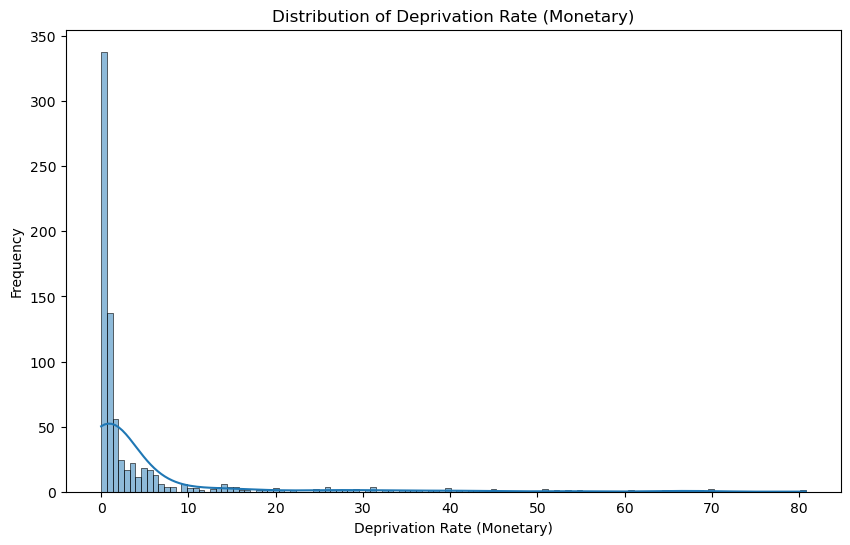

In [15]:
# Visualizations
# Distribution of Deprivation Rate (Monetary)
plt.figure(figsize=(10, 6))
sns.histplot(data['Deprivation_Rate_Monetary'].dropna(), kde=True)
plt.title('Distribution of Deprivation Rate (Monetary)')
plt.xlabel('Deprivation Rate (Monetary)')
plt.ylabel('Frequency')
plt.show()

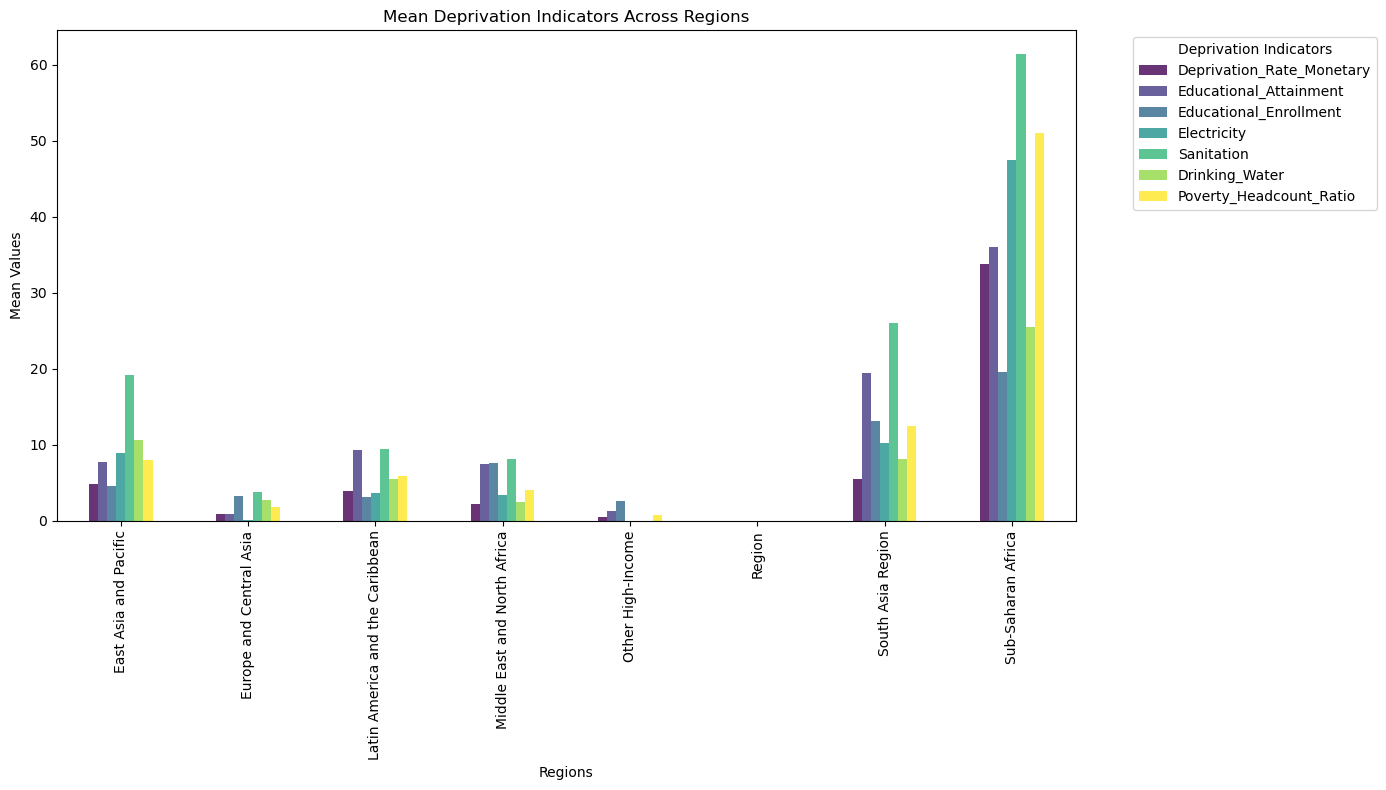

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for calculating means
numeric_columns = [
    "Deprivation_Rate_Monetary", "Educational_Attainment", 
    "Educational_Enrollment", "Electricity", "Sanitation", 
    "Drinking_Water", "Poverty_Headcount_Ratio"
]

# Group the data by Region and calculate mean for numeric columns
region_means = data.groupby('Region')[numeric_columns].mean()

# Plot mean deprivation indicators for each region as a grouped bar chart
region_means.plot(kind='bar', figsize=(14, 8), cmap='viridis', alpha=0.8)
plt.title('Mean Deprivation Indicators Across Regions')
plt.xlabel('Regions')
plt.ylabel('Mean Values')
plt.legend(title='Deprivation Indicators', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()





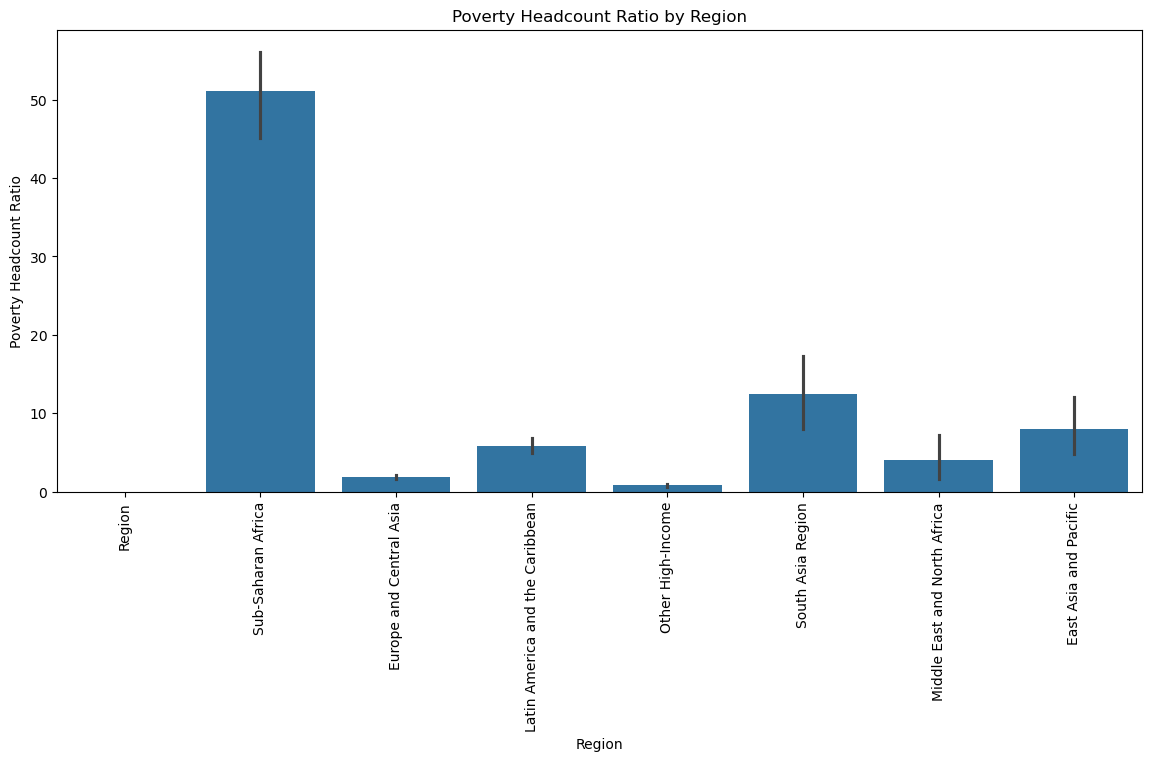

In [21]:
# Bar Plot of Poverty Headcount Ratio by Region
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Poverty_Headcount_Ratio', data=data)
plt.title('Poverty Headcount Ratio by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Poverty Headcount Ratio')
plt.show()